## 1. Importações 🧠

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import plotly.express as px
from matplotlib.colors import ListedColormap
import seaborn as sns
# import graphviz
from sklearn.tree import export_graphviz

## 2. Leitura Base de Dados 🦩

In [ ]:
df = pd.read_csv('oficial.csv', sep=';', encoding='utf-8')
X = df.drop(columns='RiskLevel')
y = df['RiskLevel']

def desenhar_arvore(arvore, nome_arquivo="arvore", preproc=None):
    dot_data = export_graphviz(
        arvore,
        out_file=None,
        feature_names=preproc.get_feature_names_out() if preproc else None,
        class_names=arvore.classes_,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render(nome_arquivo, format='png', cleanup=False)
    graph.view()


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


## 3. Análise Exploratória 👛


=== Primeiras Linhas do Dataset ===


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk



=== Informações Gerais ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB

=== Estatísticas Descritivas ===


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,low risk
freq,NaN,NaN,NaN,NaN,NaN,NaN,406
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,NaN
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,NaN
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,NaN
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,NaN
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,NaN
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,NaN



=== Verificação de Valores Ausentes ===
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


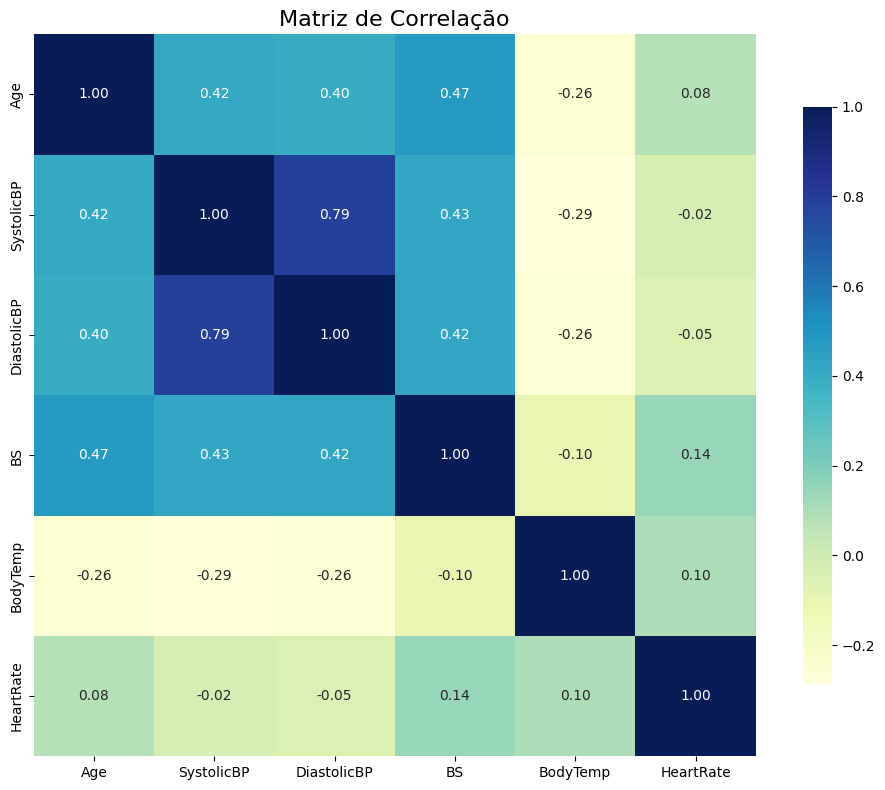

C:\Users\sofiacirino-ieg\AppData\Local\Temp\ipykernel_46696\2390039655.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=coluna, palette=['#FFCC99', '#FF99CC', '#D1B3E1'])  # tons pasteis rosados


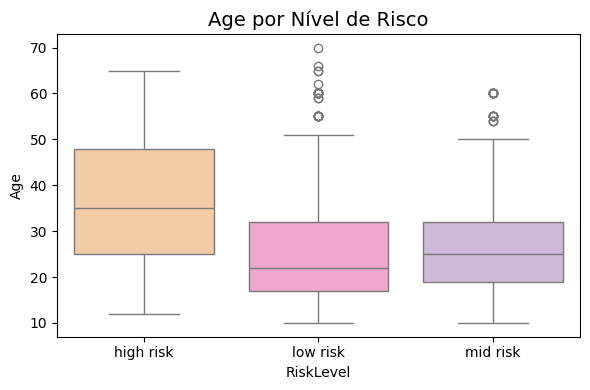

C:\Users\sofiacirino-ieg\AppData\Local\Temp\ipykernel_46696\2390039655.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=coluna, palette=['#FFCC99', '#FF99CC', '#D1B3E1'])  # tons pasteis rosados


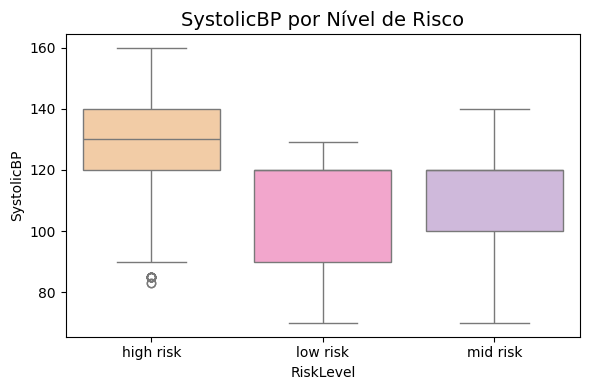

C:\Users\sofiacirino-ieg\AppData\Local\Temp\ipykernel_46696\2390039655.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=coluna, palette=['#FFCC99', '#FF99CC', '#D1B3E1'])  # tons pasteis rosados


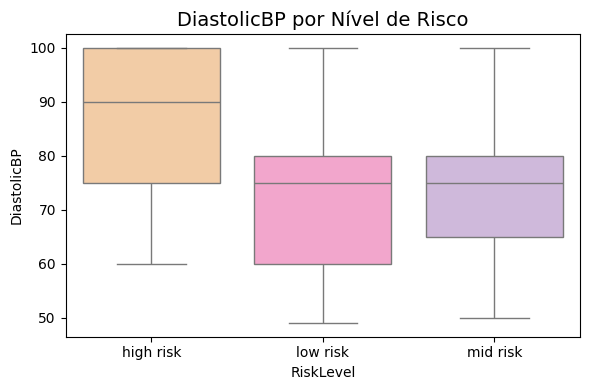

C:\Users\sofiacirino-ieg\AppData\Local\Temp\ipykernel_46696\2390039655.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=coluna, palette=['#FFCC99', '#FF99CC', '#D1B3E1'])  # tons pasteis rosados


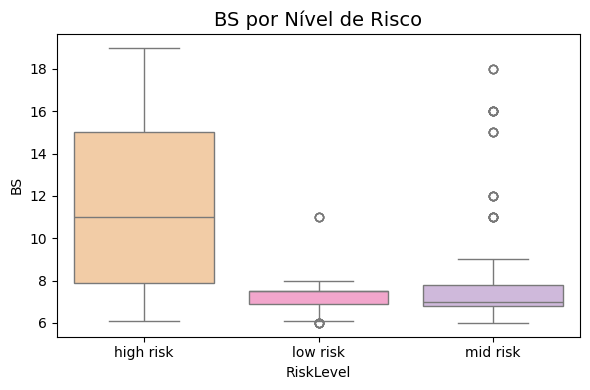

C:\Users\sofiacirino-ieg\AppData\Local\Temp\ipykernel_46696\2390039655.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=coluna, palette=['#FFCC99', '#FF99CC', '#D1B3E1'])  # tons pasteis rosados


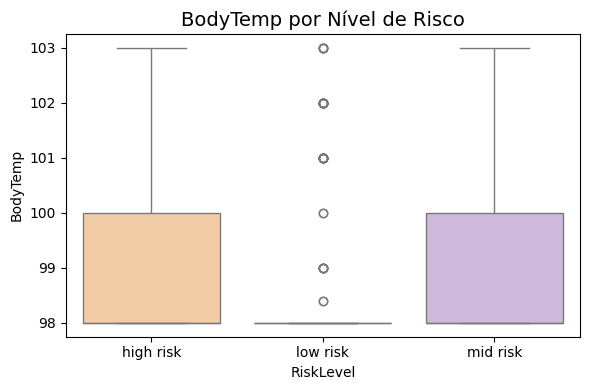

C:\Users\sofiacirino-ieg\AppData\Local\Temp\ipykernel_46696\2390039655.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='RiskLevel', y=coluna, palette=['#FFCC99', '#FF99CC', '#D1B3E1'])  # tons pasteis rosados


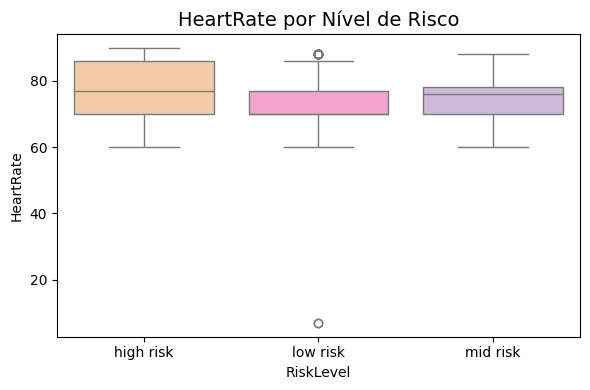

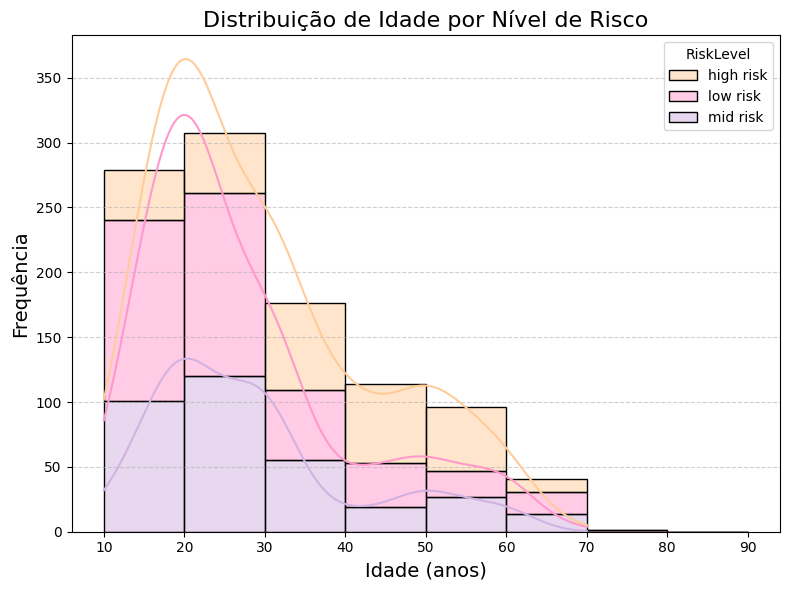

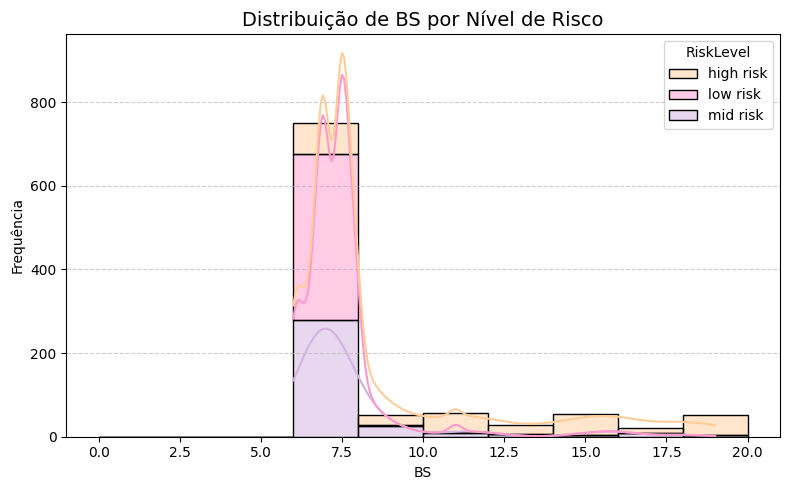

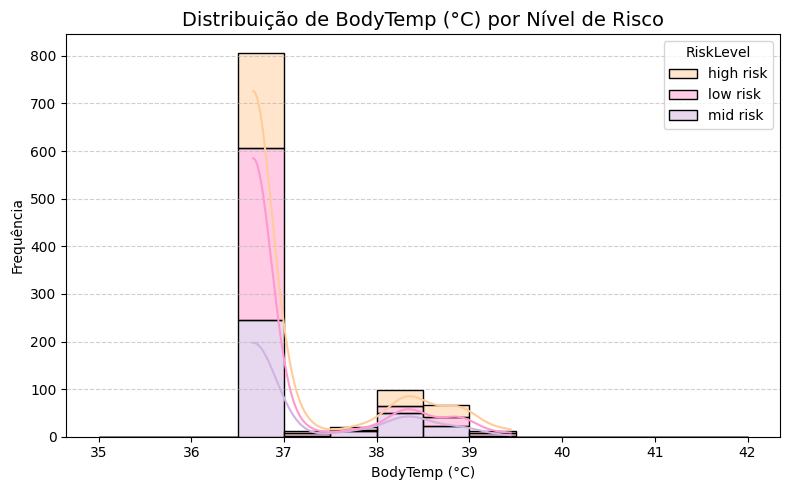

In [ ]:
# Informações iniciais
print("\n=== Primeiras Linhas do Dataset ===")
display(df.head())

print("\n=== Informações Gerais ===")
df.info()

print("\n=== Estatísticas Descritivas ===")
display(df.describe(include='all'))

print("\n=== Verificação de Valores Ausentes ===")
print(df.isnull().sum())

#Matriz de Correlação
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", square=True, cbar_kws={'shrink': 0.8})
plt.title("Matriz de Correlação", fontsize=16)
plt.tight_layout()
plt.show()

#Boxplots
variaveis_numericas = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for coluna in variaveis_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='RiskLevel', y=coluna, palette=['#FFCC99', '#FF99CC', '#D1B3E1'])  # tons pasteis rosados
    plt.title(f'{coluna} por Nível de Risco', fontsize=14)
    plt.tight_layout()
    plt.show()

# Novo Histograma: Distribuição de faixas etárias por nível de risco
bins = range(10, 100, 10)  # Faixas de 10 em 10 anos de idade
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='RiskLevel', multiple='stack', bins=bins, palette=['#FFCC99', '#FF99CC', '#D1B3E1'], edgecolor='black', kde=True)
plt.title('Distribuição de Idade por Nível de Risco', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Adicionar coluna BodyTemp_C para facilitar a visualização
df['BodyTemp_C'] = (df['BodyTemp'] - 32) * 5/9

for coluna, bins in zip(['BS', 'BodyTemp_C'], [np.arange(0, 22, 2), np.arange(35, 42.5, 0.5)]):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=coluna, hue='RiskLevel', multiple='stack',
                 bins=bins, palette=['#FFCC99', '#FF99CC', '#D1B3E1'],
                 edgecolor='black', kde=True)
    if coluna == 'BodyTemp_C':
        titulo = 'Distribuição de BodyTemp (°C) por Nível de Risco'
        xlabel = 'BodyTemp (°C)'
    else:
        titulo = 'Distribuição de BS por Nível de Risco'
        xlabel = 'BS'
    
    plt.title(titulo, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()




## Visualização PCA 🐖


Número de componentes principais utilizados (95% de variância): 5


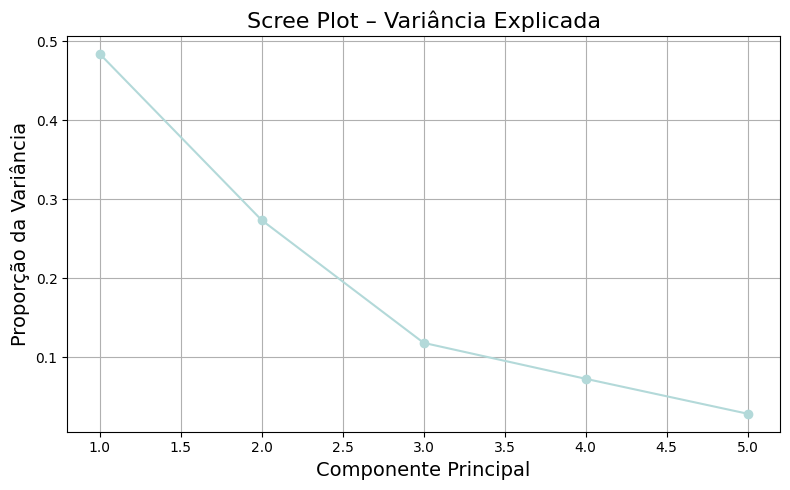

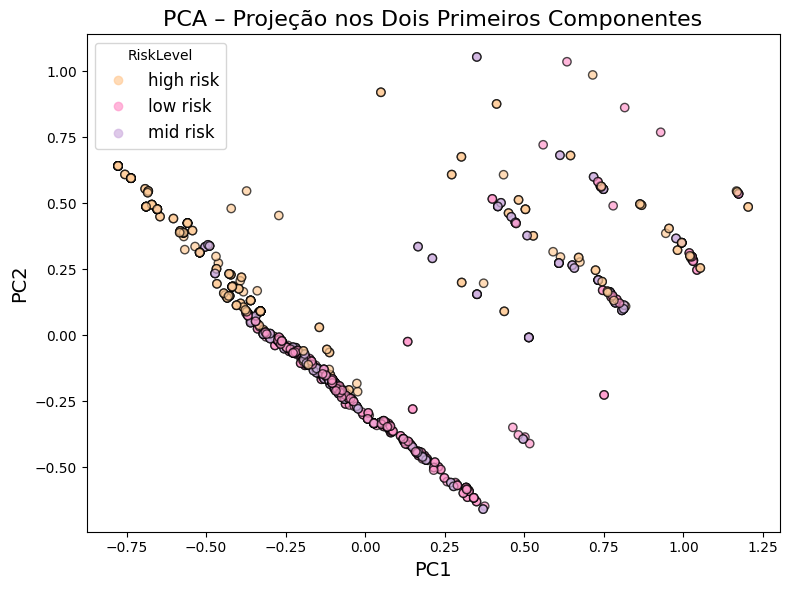


=== Loadings do PCA (Importância dos atributos por componente) ===


,PC1,PC2,PC3,PC4,PC5
Age,-0.293,0.251,0.434,0.812,-0.046
SystolicBP,-0.322,0.296,-0.329,0.012,0.834
DiastolicBP,-0.431,0.443,-0.564,-0.018,-0.539
BS,-0.281,0.461,0.610,-0.575,-0.029
BodyTemp,0.522,0.469,-0.050,0.070,0.013
HeartRate,0.011,0.040,0.095,-0.012,0.100
BodyTemp_C,0.522,0.469,-0.050,0.070,0.013


In [ ]:
preproc_pca = ColumnTransformer([
    ('num', MinMaxScaler(), make_column_selector(dtype_include=np.number)),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include=object))
], verbose_feature_names_out=False)

X_pre_pca = preproc_pca.fit_transform(df.drop(columns='RiskLevel'))
y = df['RiskLevel']
nomes_atributos = preproc_pca.get_feature_names_out()

# O valor de n_components=0.95 garante que o PCA manterá 95% da variância dos dados originais.
# Essa prática está alinhada com o conteúdo da Aula 16 do professor, onde buscamos reduzir dimensionalidade
# sem perder a maior parte da informação.
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_pre_pca)
print(f"\nNúmero de componentes principais utilizados (95% de variância): {pca.n_components_}")
var_explicada = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(var_explicada)+1), var_explicada, 'o-', color='#B3D9D9')
plt.title('Scree Plot – Variância Explicada', fontsize=16)
plt.xlabel('Componente Principal', fontsize=14)
plt.ylabel('Proporção da Variância', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


cmap_risk = ListedColormap(['#FFCC99', '#FF99CC', '#D1B3E1'])  # cores para as 3 classes
códigos = pd.Categorical(y).codes
categorias = pd.Categorical(y).categories

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=códigos, cmap=cmap_risk, edgecolor='k', alpha=0.7)
plt.title('PCA – Projeção nos Dois Primeiros Componentes', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
handles, _ = scatter.legend_elements()
plt.legend(handles, categorias, title='RiskLevel', fontsize=12)
plt.tight_layout()
plt.show()

# Mostrar a carga (loadings) de cada atributo nos componentes principais
loadings = pd.DataFrame(
    pca.components_.T,
    index=nomes_atributos,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("\n=== Loadings do PCA (Importância dos atributos por componente) ===")
display(loadings.round(3))



## 4. Separação Treino e Teste 🎀

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Pré Processamento com Ordinal Encoder e MinMaxScaler 🌺

In [ ]:
colunas_categoricas = X.select_dtypes(include='object').columns.tolist()
colunas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preproc = ColumnTransformer([
    ('cat', OrdinalEncoder(), colunas_categoricas),
    ('num', MinMaxScaler(), colunas_numericas)
], verbose_feature_names_out=False)

X_train_pre = preproc.fit_transform(X_train)
X_test_pre = preproc.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_pre)
X_test_pca = pca.transform(X_test_pre)


### KNN Encontrar Melhor Acurácia 👙

In [ ]:
melhor_k = 1
melhor_acc = 0
resultados = []

for k in range(2, 51):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train_pca, y_train)
    pred = modelo.predict(X_test_pca)
    acc = accuracy_score(y_test, pred)
    resultados.append({'k': k, 'accuracy': acc})
    if acc > melhor_acc:
        melhor_acc = acc
        melhor_k = k

df_resultados = pd.DataFrame(resultados)
print(f"\nMelhor k: {melhor_k} | Acurácia: {melhor_acc:.4f}")
display(df_resultados)

# 6. Modelo final com melhor K
modelo_final = KNeighborsClassifier(n_neighbors=melhor_k)
modelo_final.fit(X_train_pca, y_train)
y_pred = modelo_final.predict(X_test_pca)

# 7. Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Melhor k: 2 | Acurácia: 0.7520


,k,accuracy
0,2,0.751969
1,3,0.688976
2,4,0.677165
3,5,0.696850
4,6,0.696850
5,7,0.724409
6,8,0.696850
7,9,0.704724
8,10,0.696850
9,11,0.704724



Relatório de Classificação:
              precision    recall  f1-score   support

   high risk       0.79      0.93      0.85        57
    low risk       0.70      0.84      0.77       102
    mid risk       0.80      0.55      0.65        95

    accuracy                           0.75       254
   macro avg       0.77      0.77      0.76       254
weighted avg       0.76      0.75      0.74       254



### Matriz Confusão KNN 🐙

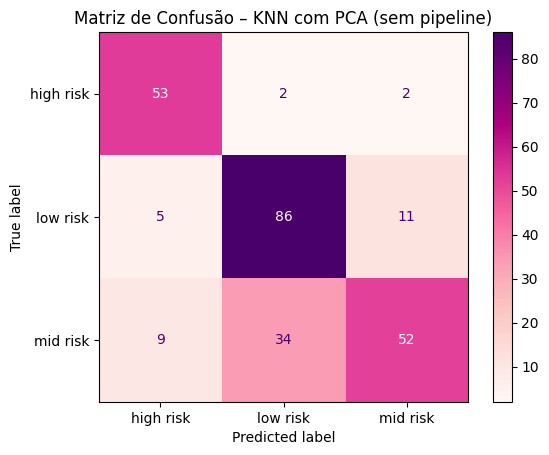

In [ ]:
matriz_conf = confusion_matrix(y_test, y_pred, labels=modelo_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf, display_labels=modelo_final.classes_)
disp.plot(cmap='RdPu', values_format='d')
plt.title("Matriz de Confusão – KNN com PCA (sem pipeline)")
plt.show()

## Naive Bayes com PCA 💞

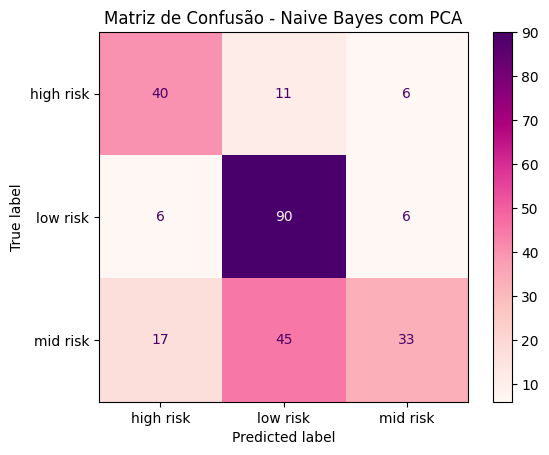

In [ ]:
modelo_nb = GaussianNB()
modelo_nb.fit(X_train_pca, y_train)

y_pred_nb = modelo_nb.predict(X_test_pca)

matriz_conf_nb = confusion_matrix(y_test, y_pred_nb, labels=modelo_nb.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_nb, display_labels=modelo_nb.classes_)
disp_nb.plot(cmap='RdPu', values_format='d')
plt.title("Matriz de Confusão - Naive Bayes com PCA")
plt.show()

## Naive Bayes sem PCA 💕


Naive Bayes – sem PCA
Acurácia: 0.5787401574803149
              precision    recall  f1-score   support

   high risk       0.76      0.61      0.68        57
    low risk       0.53      0.92      0.67       102
    mid risk       0.58      0.19      0.29        95

    accuracy                           0.58       254
   macro avg       0.62      0.58      0.55       254
weighted avg       0.60      0.58      0.53       254



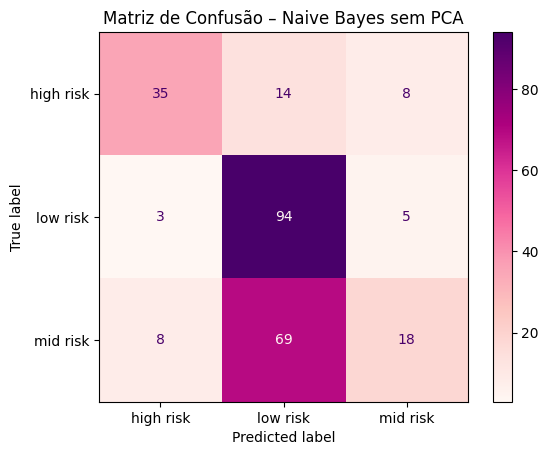

In [ ]:
# Usando os dados APENAS pré-processados (sem PCA)
modelo_nb_sem_pca = GaussianNB()
modelo_nb_sem_pca.fit(X_train_pre, y_train)

# Predição
y_pred_nb_sem_pca = modelo_nb_sem_pca.predict(X_test_pre)

# Avaliação
print("\nNaive Bayes – sem PCA")
print("Acurácia:", accuracy_score(y_test, y_pred_nb_sem_pca))
print(classification_report(y_test, y_pred_nb_sem_pca))

# Matriz de confusão rosinha 💗
matriz_conf_nb_sem_pca = confusion_matrix(y_test, y_pred_nb_sem_pca, labels=modelo_nb_sem_pca.classes_)
disp_nb_sem_pca = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_nb_sem_pca, display_labels=modelo_nb_sem_pca.classes_)
disp_nb_sem_pca.plot(cmap='RdPu', values_format='d')
plt.title("Matriz de Confusão – Naive Bayes sem PCA")
plt.show()

## Árvore Entropia X Gini


Melhor árvore SEM PCA:
Parâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Acurácia: 0.7992125984251969
              precision    recall  f1-score   support

   high risk       0.85      0.88      0.86        57
    low risk       0.84      0.75      0.79       102
    mid risk       0.73      0.81      0.77        95

    accuracy                           0.80       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.80      0.80      0.80       254



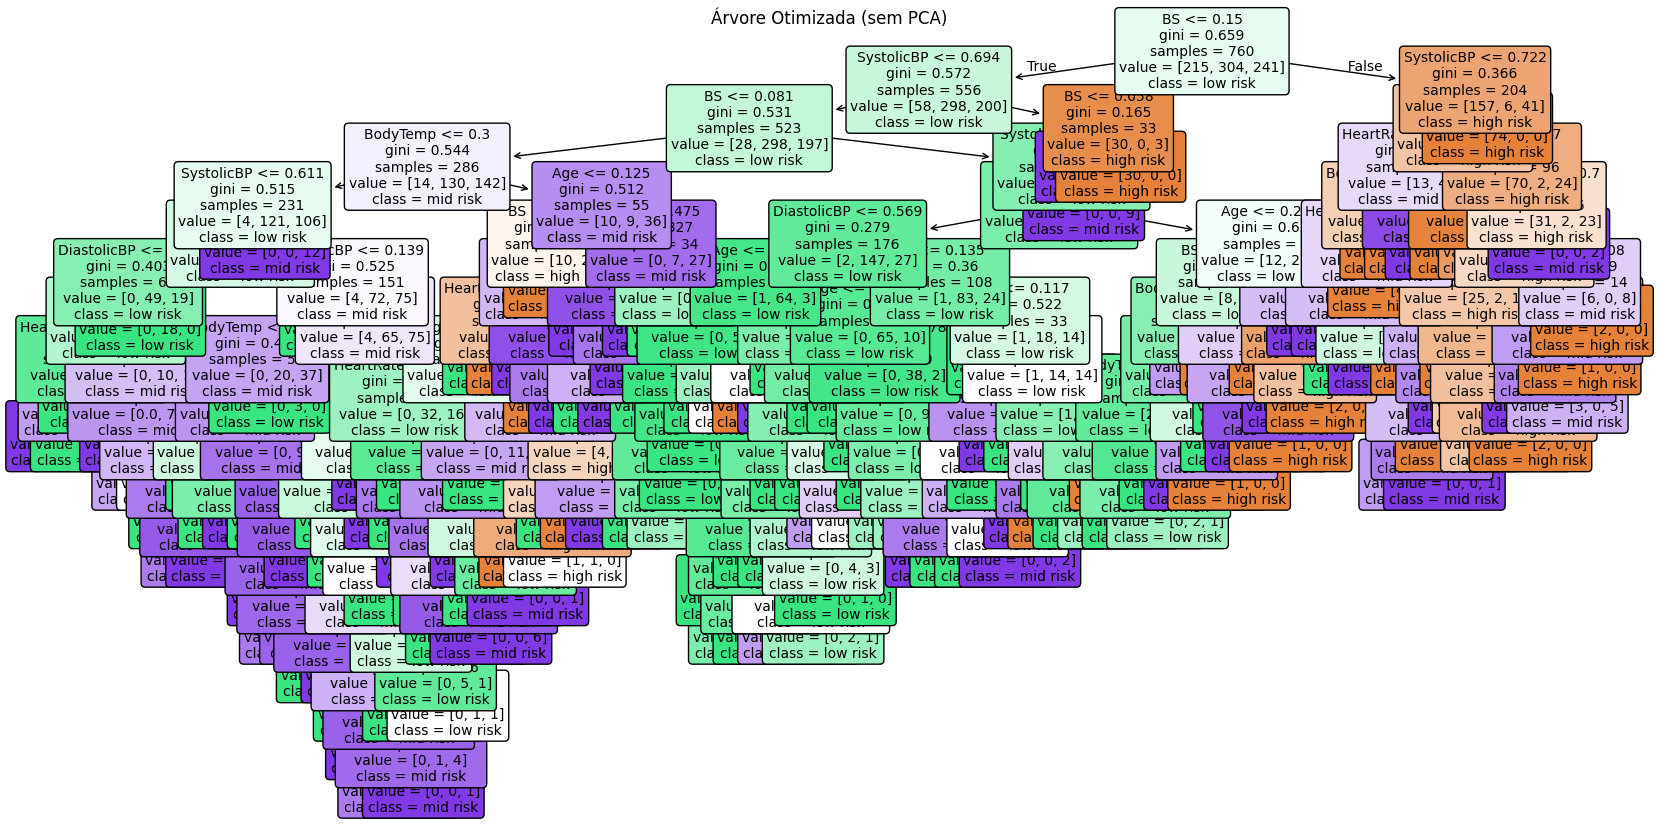


Melhor árvore COM PCA:
Parâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Acurácia: 0.7834645669291339
              precision    recall  f1-score   support

   high risk       0.78      0.88      0.83        57
    low risk       0.80      0.73      0.76       102
    mid risk       0.77      0.79      0.78        95

    accuracy                           0.78       254
   macro avg       0.78      0.80      0.79       254
weighted avg       0.78      0.78      0.78       254



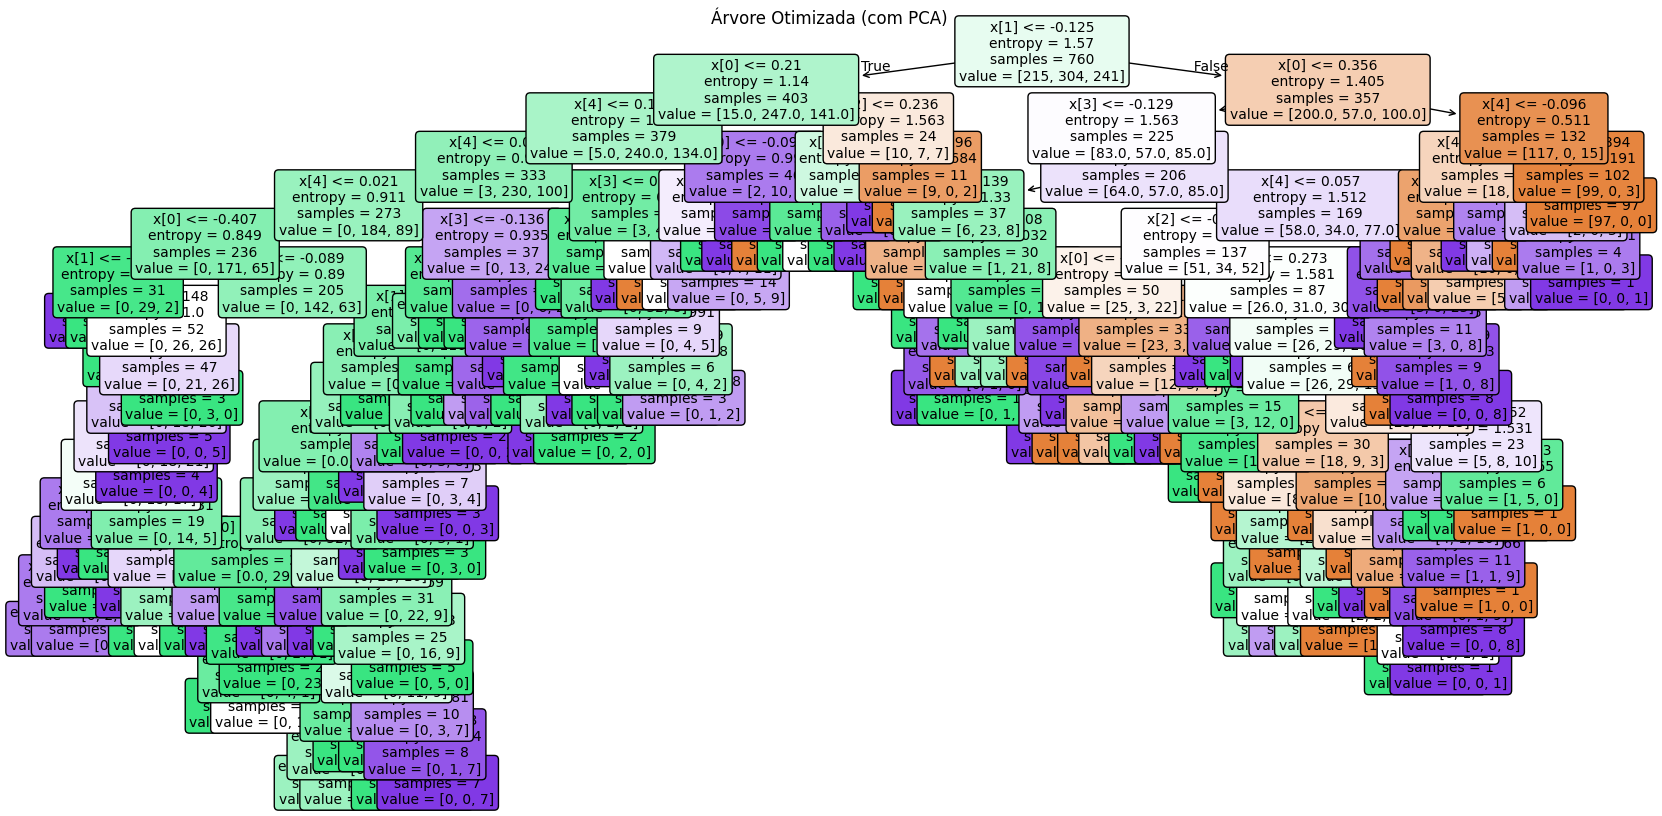

In [ ]:
# === NOVO BLOCO 11 ===
from sklearn.model_selection import GridSearchCV

# Parâmetros para o GridSearch
parametros = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# === ÁRVORE SEM PCA ===
arvore = DecisionTreeClassifier(random_state=42)
grid_arvore = GridSearchCV(arvore, parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid_arvore.fit(X_train_pre, y_train)

melhor_arvore = grid_arvore.best_estimator_
print("\nMelhor árvore SEM PCA:")
print("Parâmetros:", grid_arvore.best_params_)
print("Acurácia:", accuracy_score(y_test, melhor_arvore.predict(X_test_pre)))
print(classification_report(y_test, melhor_arvore.predict(X_test_pre)))

plt.figure(figsize=(20,10))
plot_tree(melhor_arvore,
          feature_names=preproc.get_feature_names_out(),
          class_names=melhor_arvore.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Árvore Otimizada (sem PCA)")
plt.show()

# === ÁRVORE COM PCA ===
arvore_pca = DecisionTreeClassifier(random_state=42)
grid_arvore_pca = GridSearchCV(arvore_pca, parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid_arvore_pca.fit(X_train_pca, y_train)

melhor_arvore_pca = grid_arvore_pca.best_estimator_
print("\nMelhor árvore COM PCA:")
print("Parâmetros:", grid_arvore_pca.best_params_)
print("Acurácia:", accuracy_score(y_test, melhor_arvore_pca.predict(X_test_pca)))
print(classification_report(y_test, melhor_arvore_pca.predict(X_test_pca)))

plt.figure(figsize=(20,10))
plot_tree(melhor_arvore_pca,
          filled=True, rounded=True, fontsize=10)
plt.title("Árvore Otimizada (com PCA)")
plt.show()


## CCP Alpha


🔍 Analisando poda para critério: GINI


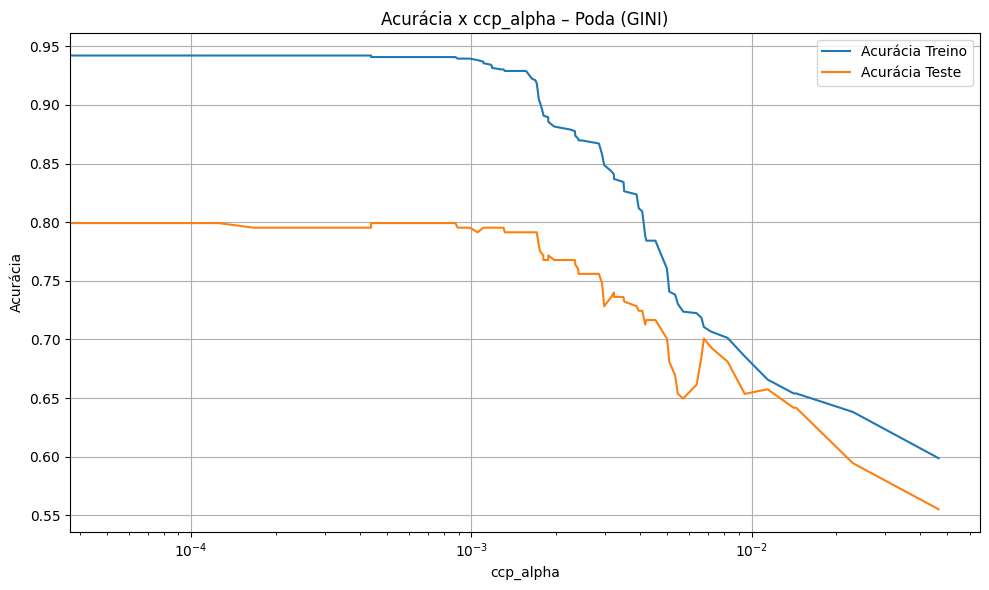


🔍 Analisando poda para critério: ENTROPY


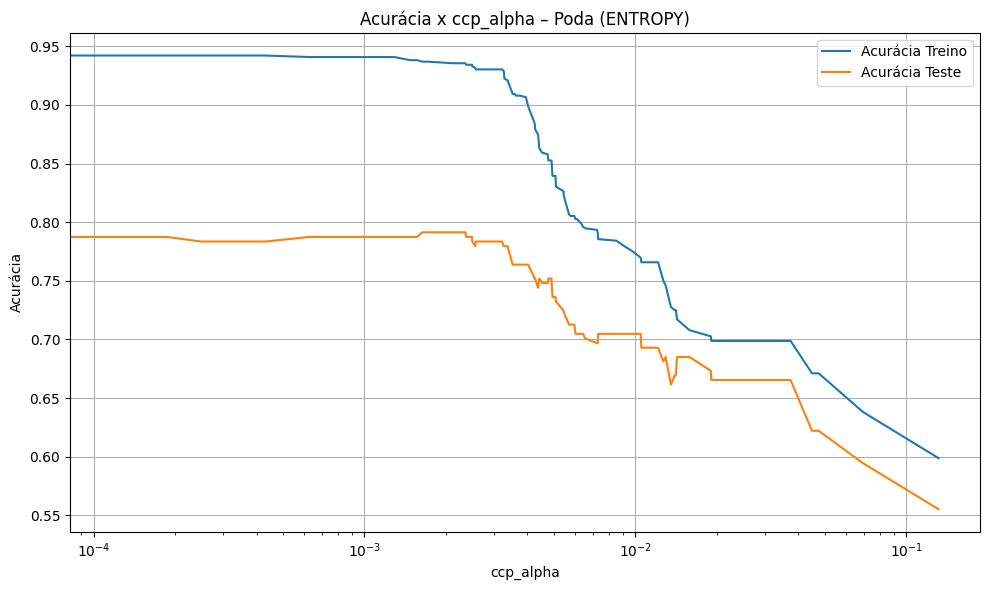

In [ ]:
# === BLOCO EXTRA: PODA GINI E ENTROPIA SEM PCA ===
criterios = ['gini', 'entropy']

for criterio in criterios:
    print(f"\n🔍 Analisando poda para critério: {criterio.upper()}")
    arvore_base = DecisionTreeClassifier(criterion=criterio, random_state=42)
    path = arvore_base.cost_complexity_pruning_path(X_train_pre, y_train)
    ccp_alphas = path.ccp_alphas[:-1]  # Remove último que zera a árvore

    acuracia_treino = []
    acuracia_teste = []

    for alpha in ccp_alphas:
        modelo = DecisionTreeClassifier(criterion=criterio, ccp_alpha=alpha, random_state=42)
        modelo.fit(X_train_pre, y_train)
        acuracia_treino.append(accuracy_score(y_train, modelo.predict(X_train_pre)))
        acuracia_teste.append(accuracy_score(y_test, modelo.predict(X_test_pre)))

    df_poda = pd.DataFrame({
        'ccp_alpha': ccp_alphas,
        'Acurácia Treino': acuracia_treino,
        'Acurácia Teste': acuracia_teste
    }).melt(id_vars='ccp_alpha', var_name='Conjunto', value_name='Acurácia')

    plt.figure(figsize=(10,6))
    for conjunto in df_poda['Conjunto'].unique():
        subset = df_poda[df_poda['Conjunto'] == conjunto]
        plt.plot(subset['ccp_alpha'], subset['Acurácia'], label=conjunto)

    plt.xlabel('ccp_alpha')
    plt.ylabel('Acurácia')
    plt.title(f'Acurácia x ccp_alpha – Poda ({criterio.upper()})')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.tight_layout()
    plt.show()


## Comparação Final 💝

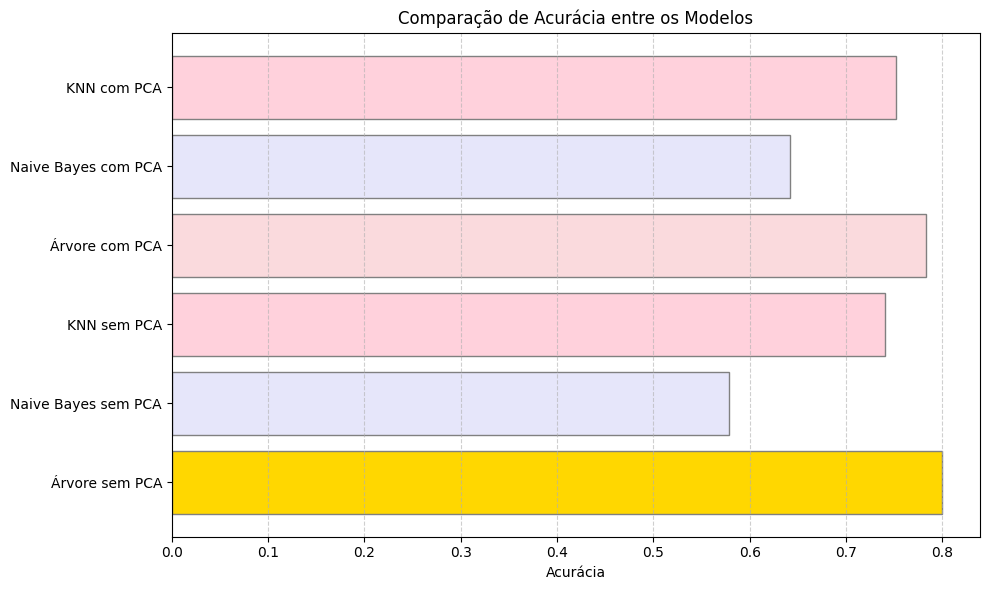

In [ ]:
# Treinar KNN sem PCA
modelo_knn_sem_pca = KNeighborsClassifier(n_neighbors=melhor_k)
modelo_knn_sem_pca.fit(X_train_pre, y_train)

# Predição
y_pred_knn_sem_pca = modelo_knn_sem_pca.predict(X_test_pre)

# Dicionário com os nomes dos modelos e suas acurácias
resultados_finais = {
    'KNN com PCA': melhor_acc,
    'Naive Bayes com PCA': accuracy_score(y_test, y_pred_nb),
    'Árvore com PCA': accuracy_score(y_test, melhor_arvore_pca.predict(X_test_pca)),
    'KNN sem PCA': accuracy_score(y_test, y_pred_knn_sem_pca), 
    'Naive Bayes sem PCA': accuracy_score(y_test, y_pred_nb_sem_pca),
    'Árvore sem PCA': accuracy_score(y_test, melhor_arvore.predict(X_test_pre))
}

# Criar DataFrame para visualização
df_comparacao = pd.DataFrame(list(resultados_finais.items()), columns=['Modelo', 'Acurácia'])

# Identificar o modelo com maior acurácia
melhor_modelo = df_comparacao.loc[df_comparacao['Acurácia'].idxmax(), 'Modelo']

# Mapear cores
cores_map = {
    'KNN': '#FFD1DC',  # rosa pastel
    'Naive Bayes': '#E6E6FA',  # lavanda
    'Árvore': '#FADADD',  # rosa claro
}
cores = []
for modelo in df_comparacao['Modelo']:
    if modelo == melhor_modelo:
        cores.append('#FFD700')  # destaque dourado para o melhor
    elif 'KNN' in modelo:
        cores.append(cores_map['KNN'])
    elif 'Naive Bayes' in modelo:
        cores.append(cores_map['Naive Bayes'])
    elif 'Árvore' in modelo:
        cores.append(cores_map['Árvore'])
    else:
        cores.append('lightgray')

# Plotando gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_comparacao['Modelo'], df_comparacao['Acurácia'], color=cores, edgecolor='gray')
plt.xlabel('Acurácia')
plt.title('Comparação de Acurácia entre os Modelos')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
